In [8]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dt_suffix = '21_01_2023_20_08_24'

In [104]:
df = pd.read_csv(f'./data/treated/{dt_suffix}_pq_leiloes.csv')

In [105]:
df.head()

auction_number  auction_item_lote auction_item_type  \
0            1081                 16            Online   
1            1081                 19            Online   
2            1081                 22            Online   
3            1081                 25            Online   
4            1081                 42            Online   

   auction_item_min_bid_value  auction_item_highest_bid auction_item_brand  \
0                     12500.0                   12500.0                 VW   
1                     11500.0                   11500.0               FIAT   
2                     16000.0                   16000.0            CITROËN   
3                     37500.0                   37500.0               FORD   
4                     17500.0                   17500.0            HYUNDAY   

   auction_item_market_price auction_item_color auction_item_gas_type  \
0                    28092.0             BRANCA                  FLEX   
1                    25613.0              PRATA                  FLEX   
2                    36027.0             BRANCA                  FLEX   
3                    83601.0              CINZA                  FLEX   
4                    39484.0              PRATA              GASOLINA   

   auction_item_km auction_date  AIR BAG  ALARME  AR CONDICIONADO  BLINDAGEM  \
0          90790.0          NaN      0.0     0.0              0.0        0.0   
1         113718.0          NaN      0.0     0.0              1.0        0.0   
2         119262.0          NaN      1.0     0.0              1.0        0.0   
3         154564.0          NaN      1.0     0.0              1.0        0.0   
4         149446.0          NaN      1.0     1.0              1.0        0.0   

   CÂMBIO AUTOMÁTICO  CÂMBIO MECÂNICO  DIREÇÃO HIDRÁULICA  FREIOS ABS  \
0                0.0              1.0                 0.0         0.0   
1                0.0              1.0                 1.0         0.0   
2                0.0              1.0                 1.0         1.0   
3                0.0              1.0                 1.0         1.0   
4                1.0              0.0                 1.0         1.0   

   TETO SOLAR  VIDRO ELÉTRICO model_name  SEM_CHAVE  TRINCADO  AVARIADO  \
0         0.0             1.0       NOVO        0.0       0.0       0.0   
1         0.0             1.0        UNO        0.0       0.0       0.0   
2         0.0             1.0         C3        0.0       0.0       1.0   
3         0.0             1.0     RANGER        0.0       0.0       0.0   
4         0.0             1.0     TUCSON        0.0       0.0       1.0   

   SINISTRO  item_age  target_percentage  target_diff   perc_dec  
0       0.0       NaN                0.0          0.0  55.503346  
1       0.0       NaN                0.0          0.0  55.100925  
2       0.0       NaN                0.0          0.0  55.588864  
3       0.0       NaN                0.0          0.0  55.144077  
4       0.0       NaN                0.0          0.0  55.678249

In [106]:
df_with_market_price = df.loc[df.perc_dec>0]

In [107]:
## Percentual médio do valor abaixo do mercado
print(f"As vendas são feitas em média a {100*df_with_market_price['perc_dec'].mean()}% abaixo do valor de mercado")

As vendas são feitas em média a 3476.682422638347% abaixo do valor de mercado


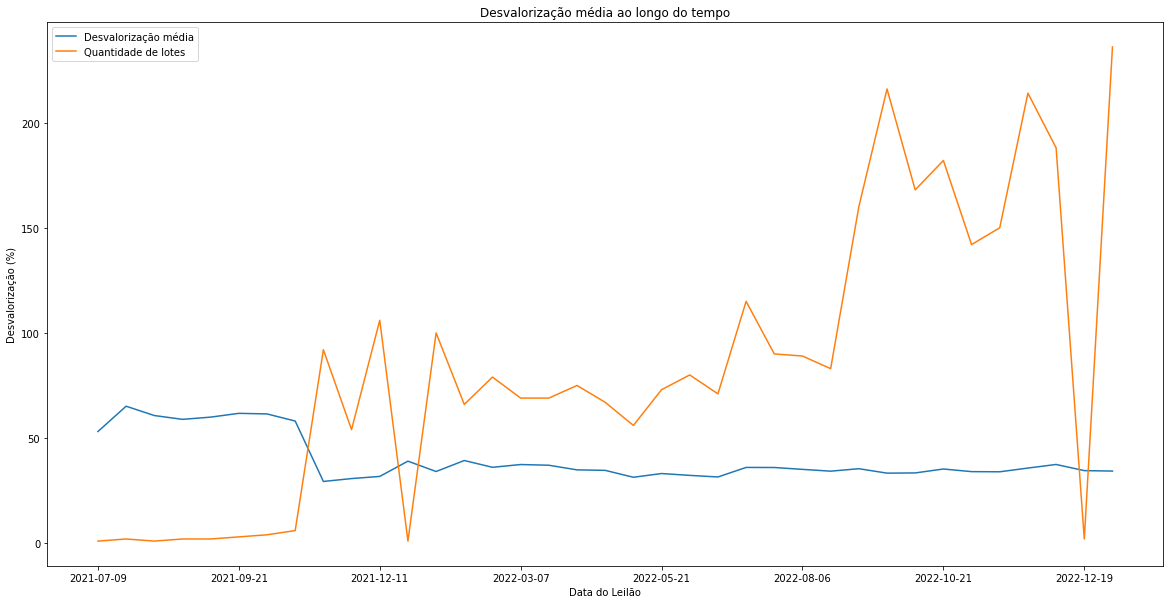

In [113]:
## Percentual médio por data do valor abaixo do mercado. Quanto maior mais vantajosa a compra.
#### auction_item_market_price não existe em valore anteriores a 2021-07-09
df_with_market_price.groupby('auction_date')['perc_dec'].mean().plot(figsize=(20,10),legend=True)
df_with_market_price.groupby('auction_date')['auction_date'].count().plot(figsize=(20,10),legend=True)
plt.xlabel('Data do Leilão')
plt.ylabel('Desvalorização (%)')
plt.title('Desvalorização média ao longo do tempo')
plt.legend(['Desvalorização média','Quantidade de lotes'])

In [127]:
df_with_market_price = df_with_market_price.loc[df_with_market_price.auction_date > '2021-11-01']

Text(0.5, 1.0, 'Quilometragem X Desvalorização')

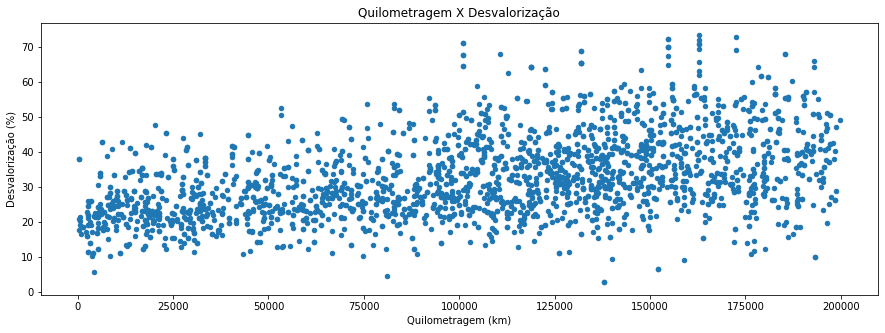

In [128]:
## Valor percentual abaixo do mercado por kms rodados
df_with_market_price.loc[df_with_market_price.auction_item_km<200_000][['auction_item_km','perc_dec']].plot.scatter('auction_item_km','perc_dec',figsize=(15,5))
plt.xlabel('Quilometragem (km)')
plt.ylabel('Desvalorização (%)')
plt.title('Quilometragem X Desvalorização')

In [129]:
df_with_market_price['auction_date'] = pd.to_datetime(df_with_market_price['auction_date'])

Text(0.5, 1.0, 'Cor X Desvalorização')

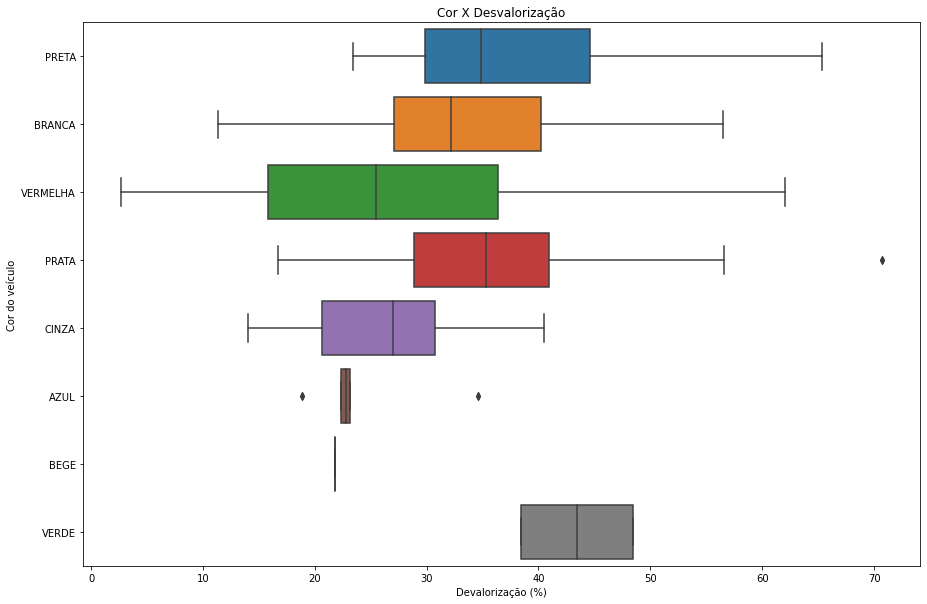

In [130]:
## Valor percentual abaixo do mercado por kms rodados do último leilão por cor do carro
plt.figure(figsize=(15,10))
sns.boxplot(x='perc_dec', y='auction_item_color', data=df_with_market_price.loc[df_with_market_price['auction_date'] == df_with_market_price['auction_date'].max()])
plt.xlabel('Devalorização (%)')
plt.ylabel('Cor do veículo')
plt.title('Cor X Desvalorização')

Text(0.5, 1.0, 'Marca X Desvalorização')

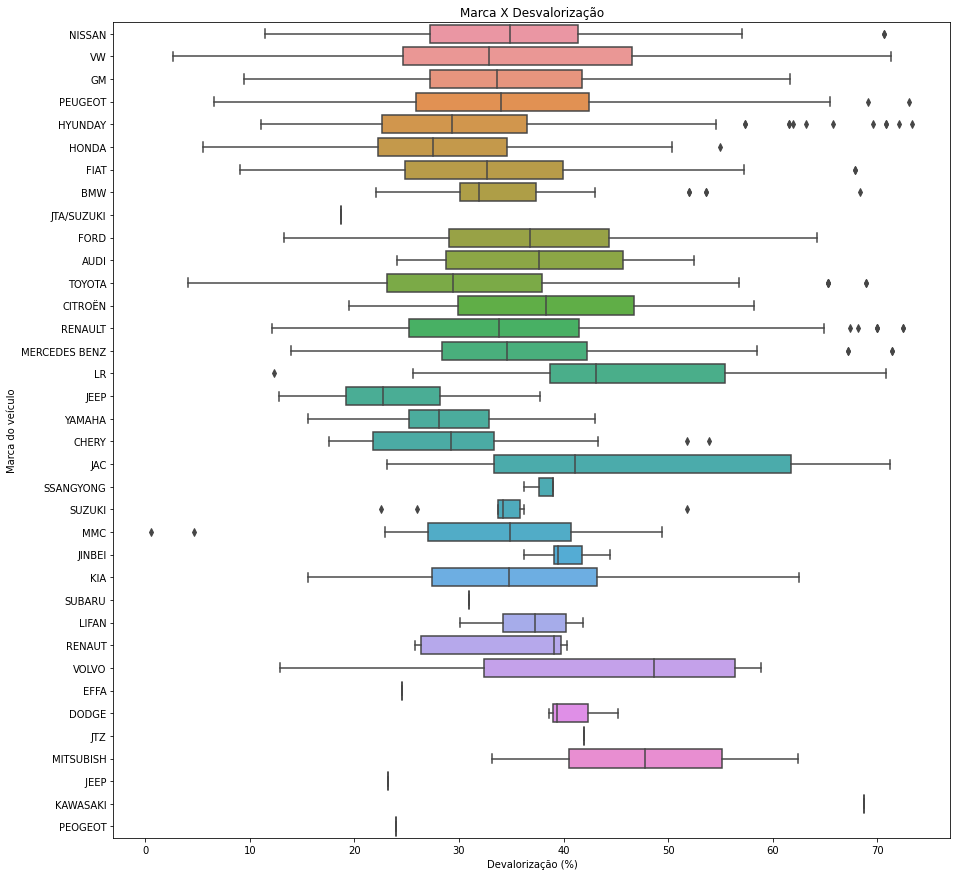

In [131]:
## Valor percentual abaixo do mercado por kms rodados do último leilão por cor do carro por marca de carro
plt.figure(figsize=(15,15))
sns.boxplot(x='perc_dec', y='auction_item_brand', data=df_with_market_price)
plt.xlabel('Devalorização (%)')
plt.ylabel('Marca do veículo')
plt.title('Marca X Desvalorização')

In [132]:
df_prof = df[[
       'auction_item_min_bid_value', 'auction_item_highest_bid',
       'auction_item_market_price', 'auction_item_color',
       'auction_item_gas_type', 'auction_item_km', 
       'item_age', 'target_percentage', 'target_diff', 'perc_dec']]

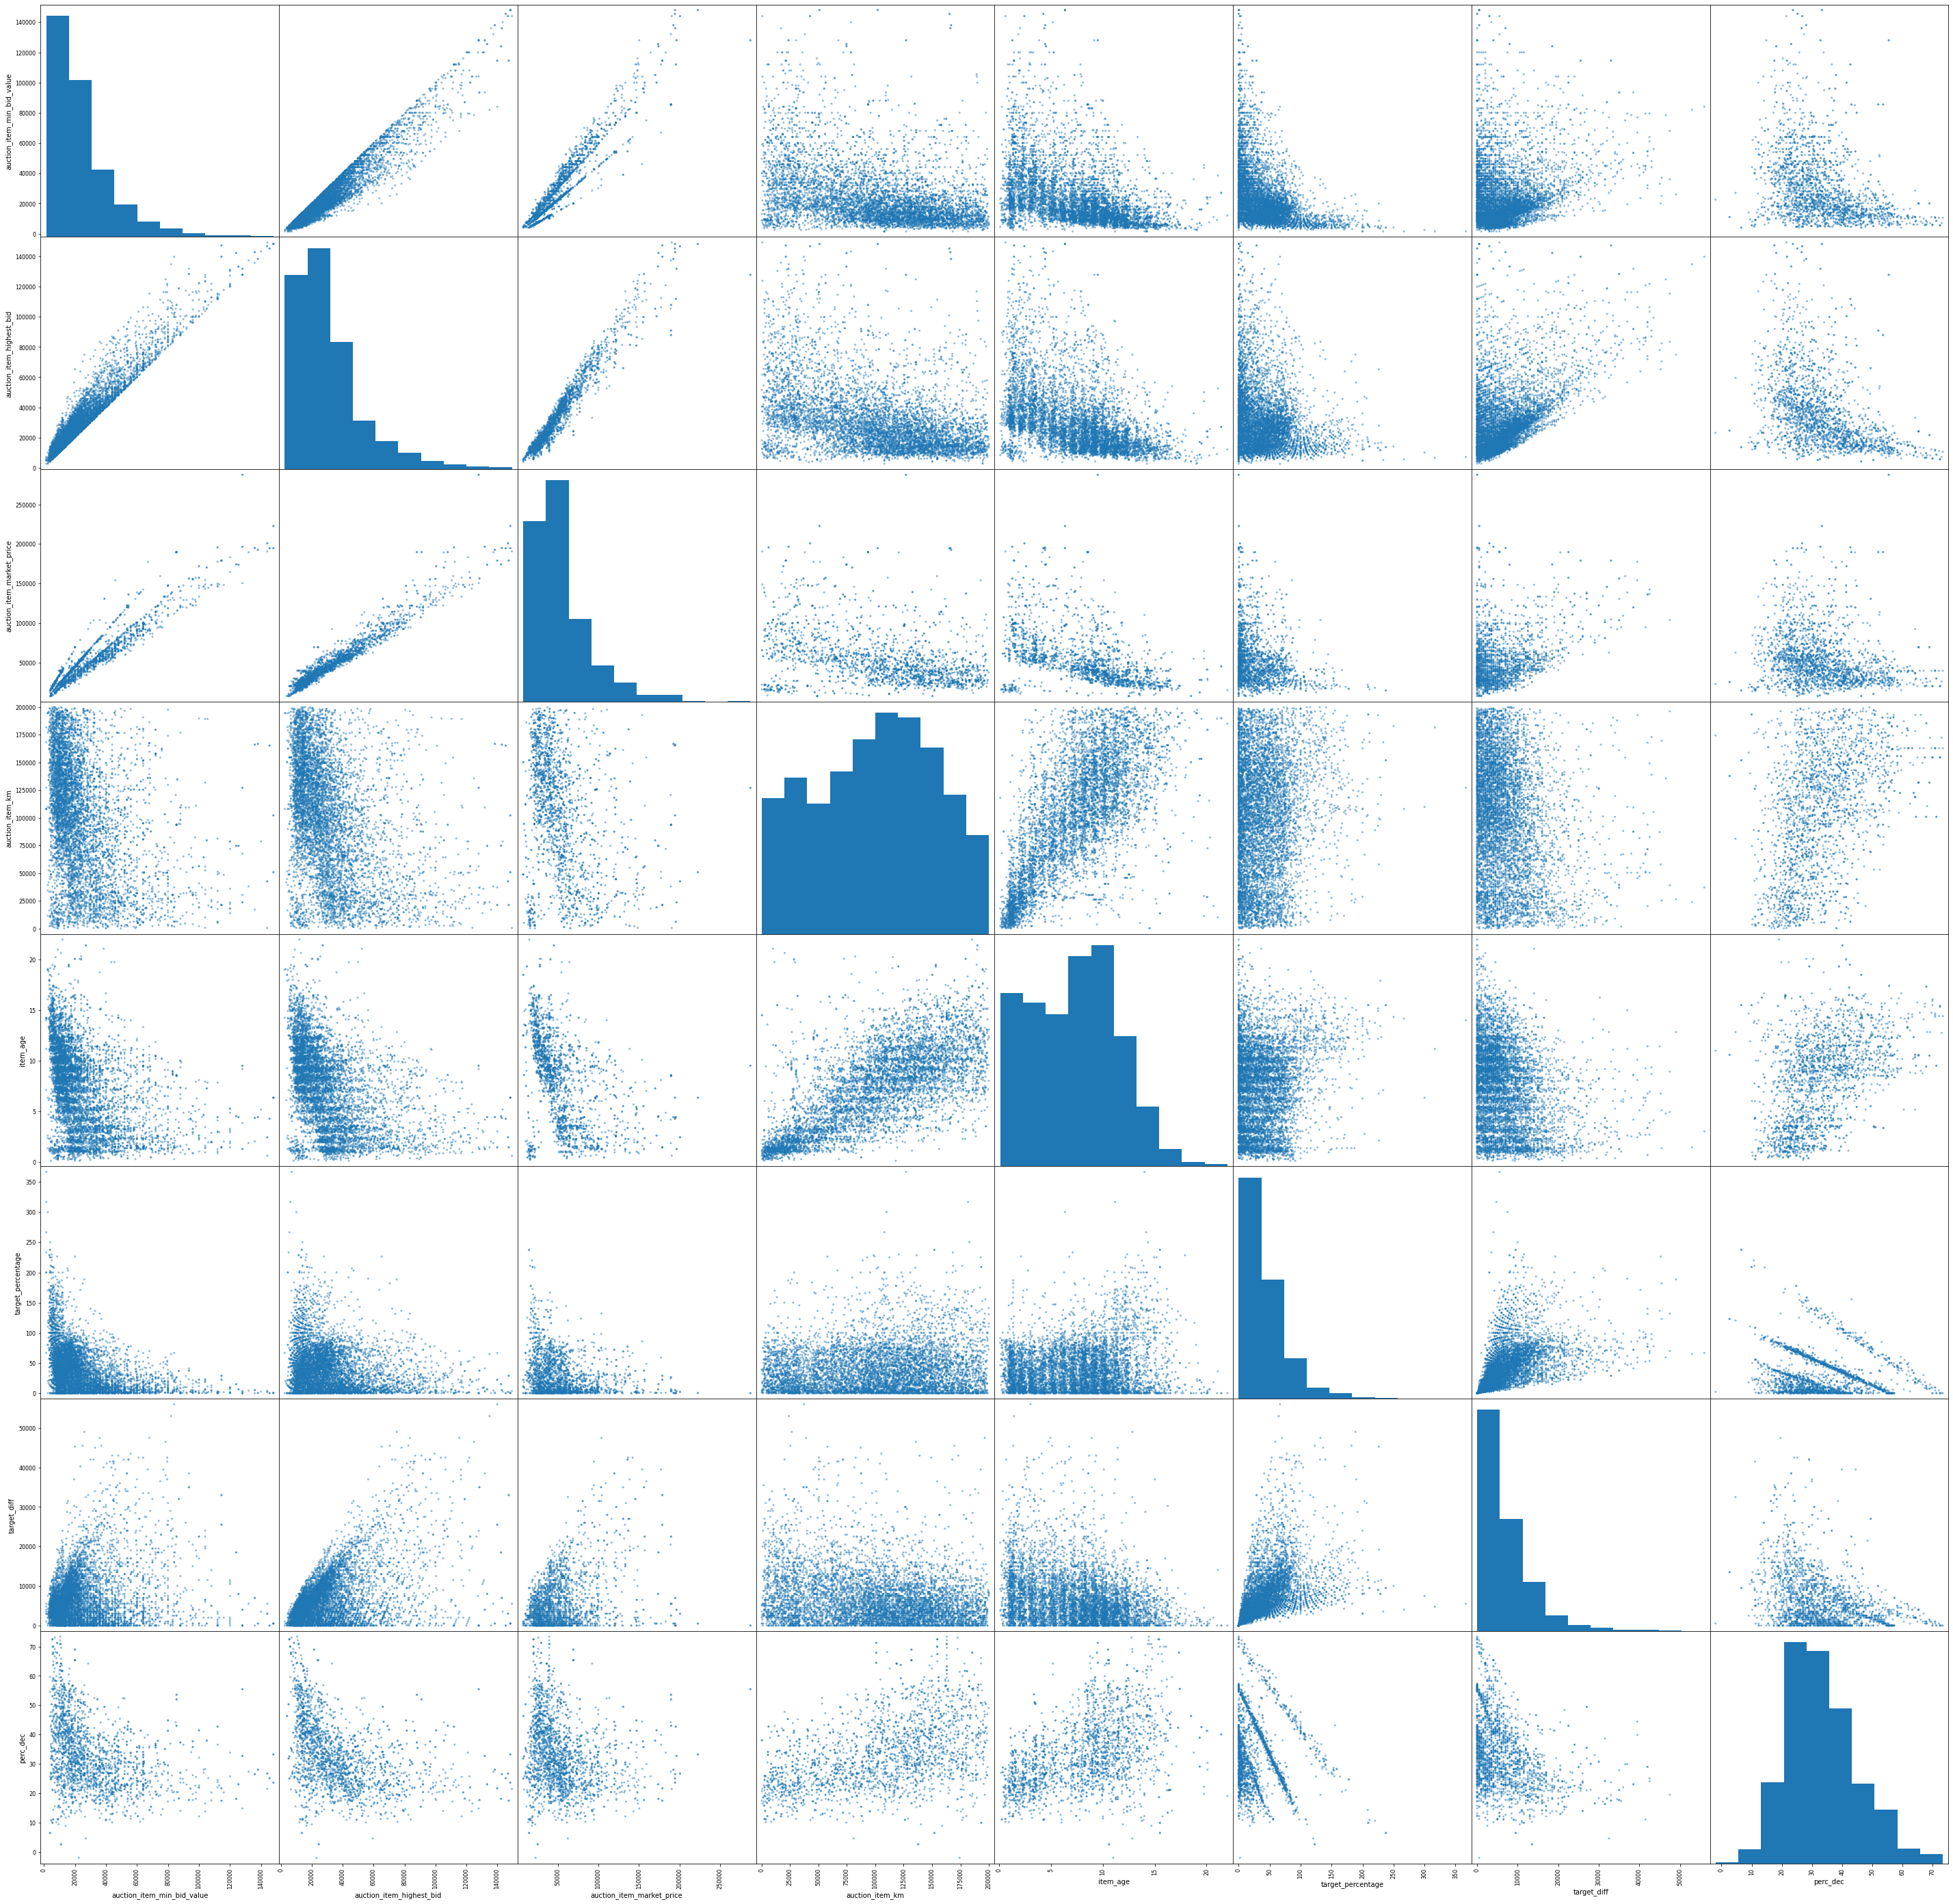

In [133]:
a = pd.plotting.scatter_matrix(df_prof.loc[(df_prof.auction_item_highest_bid < 150_000) 
                                        & ( df_prof.auction_item_km< 200_000)
                                        & ( df_prof.item_age>0)
                                        & ( df_prof.target_diff<60000)
                                        & ( df_prof.target_percentage<400)
                                        ],figsize=(50,50))

Text(0.5, 1.0, 'Precificação do lance mínimo')

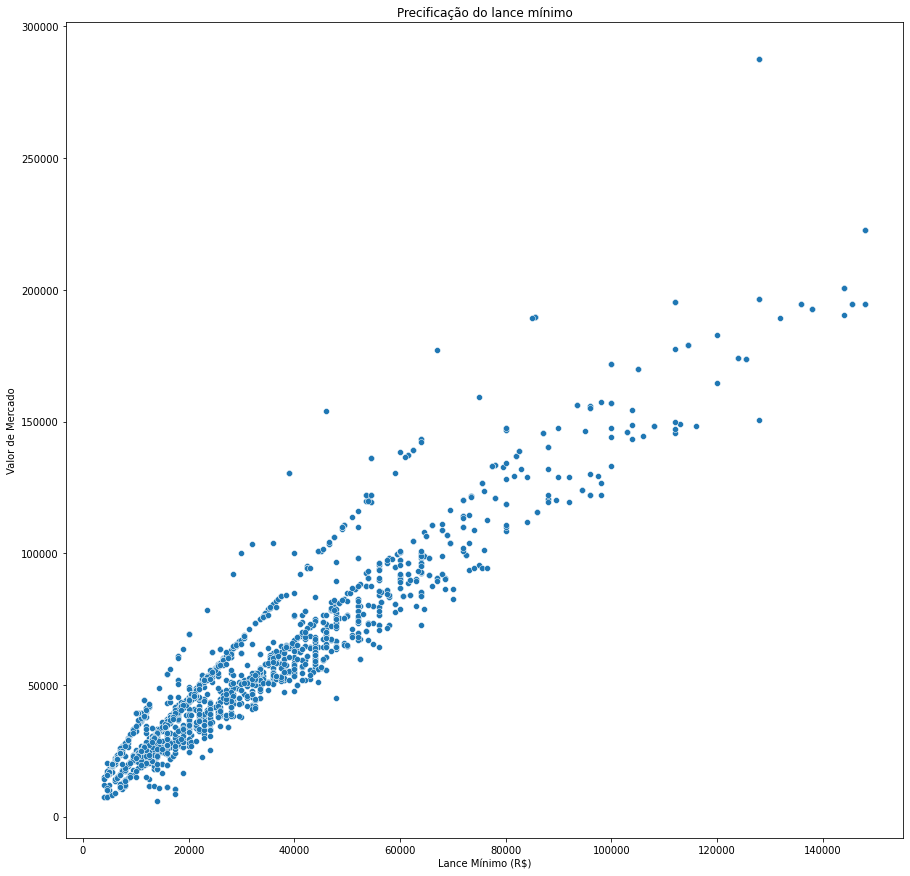

In [134]:
##Relação entre valor de mercado e valor mínimo do lote
plt.figure(figsize=(15,15))
sns.scatterplot(data = df.loc[(df.auction_item_highest_bid < 150_000) & ( df.auction_item_km< 200_000)],
               x='auction_item_min_bid_value',y='auction_item_market_price')
plt.xlabel('Lance Mínimo (R$)')
plt.ylabel('Valor de Mercado')
plt.title('Precificação do lance mínimo')

Text(0.5, 1.0, 'Rodagem dos veículos')

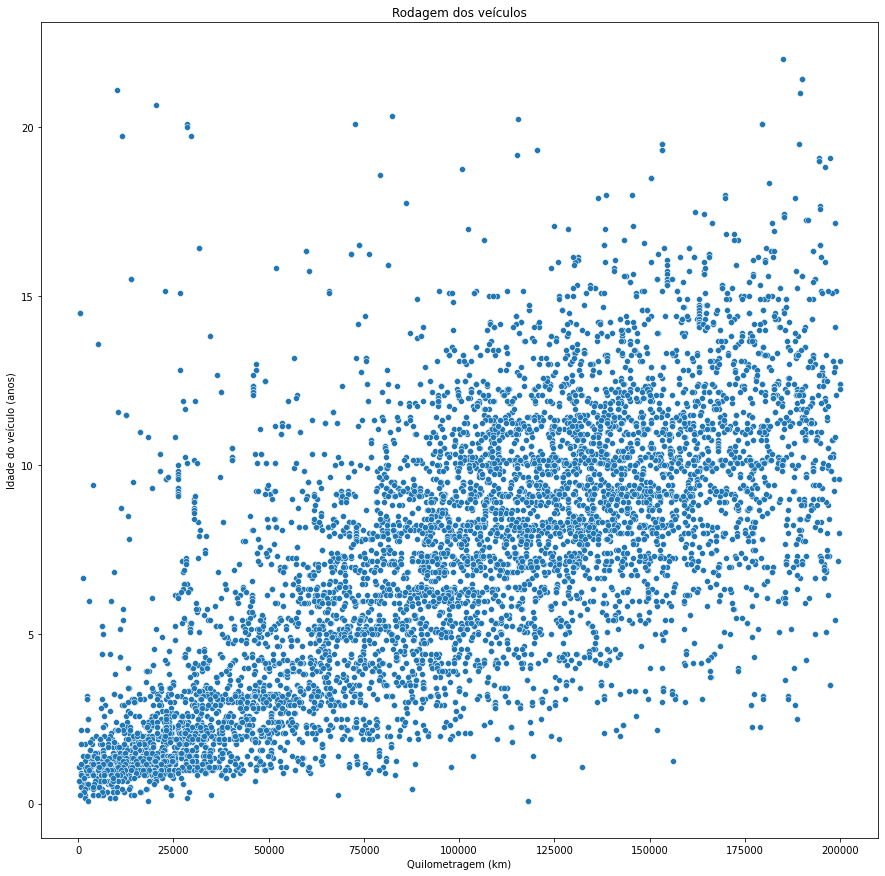

In [135]:
##Relação entre valor de mercado e valor mínimo do lote
plt.figure(figsize=(15,15))
sns.scatterplot(data = df.loc[(df.item_age > 0 ) & ( df.auction_item_km< 200_000)],
               x='auction_item_km',y='item_age')
plt.xlabel('Quilometragem (km)')
plt.ylabel('Idade do veículo (anos)')
plt.title('Rodagem dos veículos')

In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pd.DataFrame(df.loc[(df.item_age > 0 ) & ( df.auction_item_km< 200_000)].item_age),
            df.loc[(df.item_age > 0 ) & ( df.auction_item_km< 200_000)].auction_item_km
)
print('Média de rodagem por ano dos veículos:',model.coef_[0],'km')

Média de rodagem por ano dos veículos: 9120.433449971304 km


Text(0.5, 1.0, 'Precificação por idade')

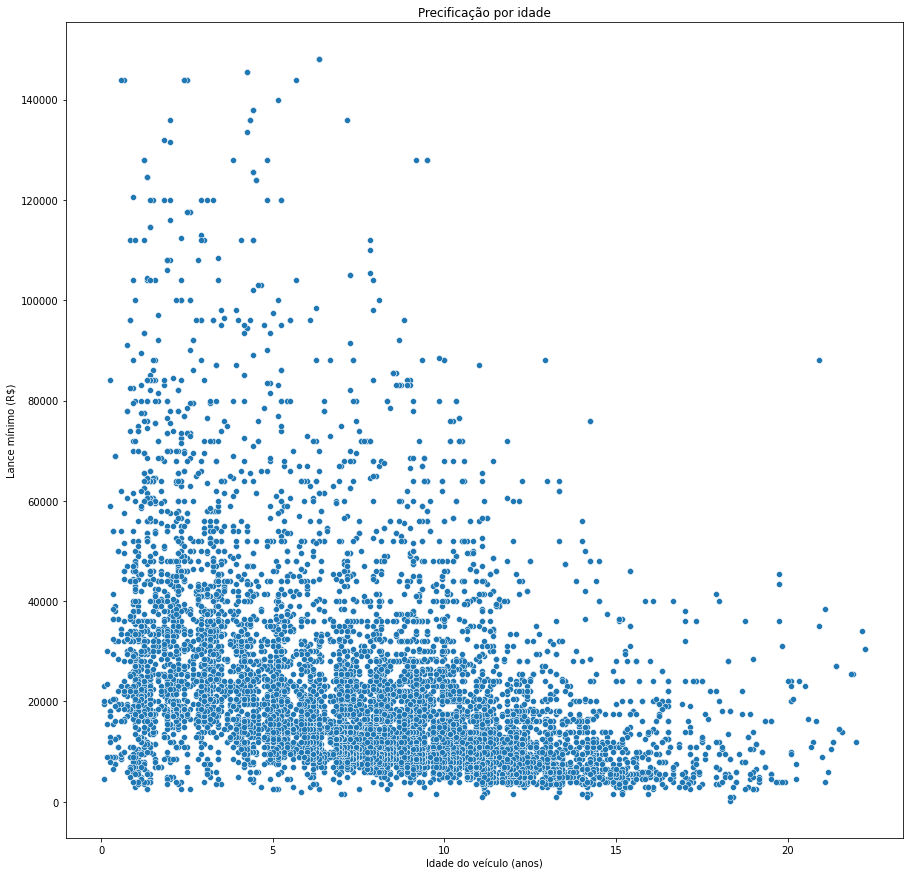

In [68]:
##Relação entre valor de mercado e valor mínimo do lote
plt.figure(figsize=(15,15))
sns.scatterplot(data = df.loc[(df.item_age > 0 ) & ( df.auction_item_min_bid_value< 150_000)],
               x='item_age',y='auction_item_min_bid_value')
plt.xlabel('Idade do veículo (anos)')
plt.ylabel('Lance mínimo (R$)')
plt.title('Precificação por idade')

In [138]:
df_with_market_price = df_with_market_price.rename({'perc_dec':'desvalorizacao', 
           'target_percentage':'perc_acrescimo_minimo',
           'target_diff': 'acrescimo_minimo'
           }, axis=1)

In [94]:
corr = df_with_market_price.corr()


In [139]:
MIN_CORR = 0.15 ## correlação absoluta mínima
corr = corr.loc[~(
        (abs(corr.perc_acrescimo_minimo)<MIN_CORR)
        & (abs(corr.perc_acrescimo_minimo)<MIN_CORR)
        & (abs(corr.desvalorizacao)<MIN_CORR)
)]
corr = corr[list(corr.index)]

Text(0.5, 1.0, 'Correlação')

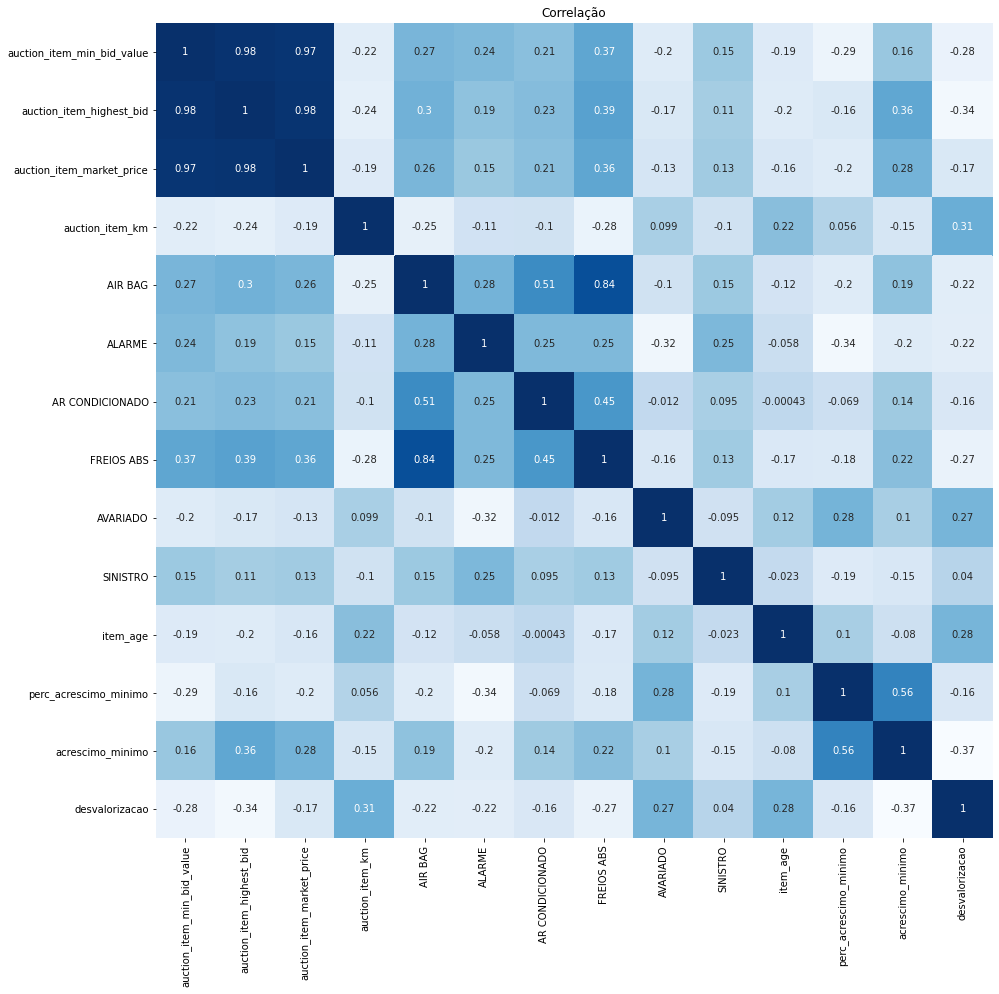

In [140]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="Blues", annot=True, cbar=False)
plt.title('Correlação')